# Análise de Algoritmos

Um algoritmo é um procedimento ou fórmula para resolver um problema, alguns são tão importantes que recebem nomes especiais, como: **merge sort**, **bubble sort**, **binary search**. A grande questão é: como podemos comparar algoritmos para sabermos quais são melhores e mais eficientes?

## Algoritmos Básicos

A seguir veremos alguns exemplos de algoritmos e ao longo do notebook vamos buscar compreender o que significa um algoritmo eficaz.

A seguir, vamos definir uma função chamada de **soma**, que recebe um número **n** como input e retorna a soma dos números **0** até **n**:

In [1]:
def soma_um(n):
    soma_final = 0
    for x in range(n+1):
        soma_final += x
    return soma_final

In [2]:
print(soma_um(10))
print(soma_um(15))

55
120


A solução anterior usa um **for loop** para obter a soma dos números, outra opção que temos é usar uma fórmula para resolver este problema:

$\sum = \dfrac{n \times (n + 1)}{2}$

Da mesma forma, a função recebe um número **n** como input e retorna a soma dos números **0** até **n**:

In [5]:
def soma_dois(n):
    return int((n*(n+1))/2)

In [6]:
print(soma_dois(10))
print(soma_dois(15))

55
120


Observe que:

- A função **soma_um** utiliza um **for loop** para adicionar iterativamente.

- A função **soma_dois** faz uso de uma fórmula para resolver o problema.

## Comparando-os Objetivamente

Para compararmos os algoritmos de forma objetiva, é importante levarmos em conta, principalmente:

- Espaço de memória
- Tempo para executar

Para medir o desempenho, vamos utilizar o comando mágico constrúido do Jupyter-Notebook:

In [7]:
%timeit soma_um(100) # Resultado em microsegundos

4.49 µs ± 34 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [8]:
%timeit soma_dois(100) # Resultado em nanosegundos

303 ns ± 13.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Lembrando que:

**MICRO** = $10^{-6}$

**NANO** = $10^{-9}$

Quanto menor o número, melhor o desempenho do nosso algoritmo!

#### Importante

- Não podemos simplesmente depender em tempo de execução porque a maioria dos computadores são diferentes e alguns são mais rápidos do que outros.
- Para que nossa avaliação seja independente do Hardware, precisamos de **Big O**.

## Big O

Com **[Big O](https://en.wikipedia.org/wiki/Big_O_notation)** nós podemos objetivamente comparar a eficiência de algoritmos ao compararmos o número de atribuições que cada algoritmo faz.

A função **soma_um** irá criar uma atribuição `n + 1` vezes, podemos fazer essa observação baseado na função **range**. Isso significa que ela irá atribuir a variável **soma_final** `n + 1` vezes. Nós podemos então dizer que para um problema de tamanho **n** (nesse caso apenas um número **n**) essa função tomará `n + 1` passos.

Essa notação **n** nos permite comparar soluções e algoritmos relativos ao tamanho do problema, uma vez que `soma_um(10)` e `soma_um(100000)` podem tomar diferentes tempos para executar, ainda que utilizando o mesmo algoritmo. Nós também podemos perceber que ao **n** crescer para um número muito grande, o `+1` não terá muito efeito. Sendo assim, vamos começar discutindo como construir uma sintaxe para essa notação.

Notação **Big O** descreve quão rápido o tempo de execução irá aumentar relativo ao **input** ao ele crescer arbitrariamente grande.

### Quão Bem o Algoritmo Escala ao Crescerem os Dados?

Lembrando, nós desejamos comparar quão rápido o tempo de execução irá crescer, não comparar tempo de execução exatos, uma vez que estes podem variar de acordo com o hardware.

Uma vez que nós queremos comparar para um variedade de tamanhos de **input**, nós estamos apenas preocupados com o crescimento do tempo de execução relativo ao **input**, é por isso que utilizamos essa notação.

Ao **n** se tornar arbitrariamente grande, nós apenas nos preocupamos com os termos que irão crescer mais rápido ao **n** se tornar maior, nesse ponto, Análise Big O também é conhecido como análise assintótica.

Em Matemática, análise assintótica = **descrever o comportamento limite** de uma função.

Em relação ao algoritmo, queremos essencialmente saber: Qual parte do algoritmo tem o MAIOR efeito na resposta final, qual parte do algoritmo é o real gargalo, qual parte é o fator limite. Para o algoritmo **soma_um()** pode ser dito como **O(n)** uma vez que seu tempo de execução cresce linearmente com o tamanho de **input**.

A seguir, vamos definir uma simples função chamada de **BigO**:

In [9]:
def BigO(n):
    return 45*n**3 + 20*n**2 + 19

BigO(1)

84

Considere que **19** não irá escalar ou será um fator limite para o algoritmo:

In [14]:
BigO(8)

24339

Em outras palavras, **19** tem um pequeno impacto no desempenho do algoritmo:

In [15]:
BigO(10)

47019

Podemos concluir que:

- $19$ não possui um peso relevante.
- $20n^2$ nesse caso é **2000**.
- $45n^3$ nesse caso é **45000**.

A parte desse algoritmo que realmente está ligado com a resposta final ao escalarem os dados não será 45, mas sim $n^3$. 

Então podemos dizer que ele é de ordem $n^3$.

### Gráfico Big O

A seguir temos um gráfico que representa a curva de diferentes ordens:

![img](https://raw.githubusercontent.com/the-akira/Python-Matematica/master/imagens/bigo.png)

As tabelas a seguir nos apresentam as ordens mais comuns que podemos encontrar:

| Big-O         | Nome        |
| ------------- | ------      |
| 1             | Constante   |
| log(n)        | Logarítmico |
| n             | Linear      |
| n log(n)      | Log Linear  |
| n^2           | Quadrático  |
| n^3           | Cúbico      |
| 2^n           | Exponencial |

| Notação       | Nome        |
| ------------- | ------      |
| O(1)             | Constante   |
| O(log log n)        | Logarítmico dobrado |
| O(log n)             | Logarítmico      |
| O(n^c), 0 < c < 1      | potência fatorial  |
| O(n)           | Linear  |
| O(n log * n)           | n log-star n      |
| O(n log n) = O(log n!)           | Linearítmico, Log Linear |
| O(n^2)           | Quadrático |
| O(n^c), c > 1           | Polinomial |
| O(c^n), c > 1           | Exponencial |
| O(n!)           | Fatorial |

Vamos agora plotar um gráfico com diferentes ordens de crescimento utilizando a biblioteca **matplotlib**:

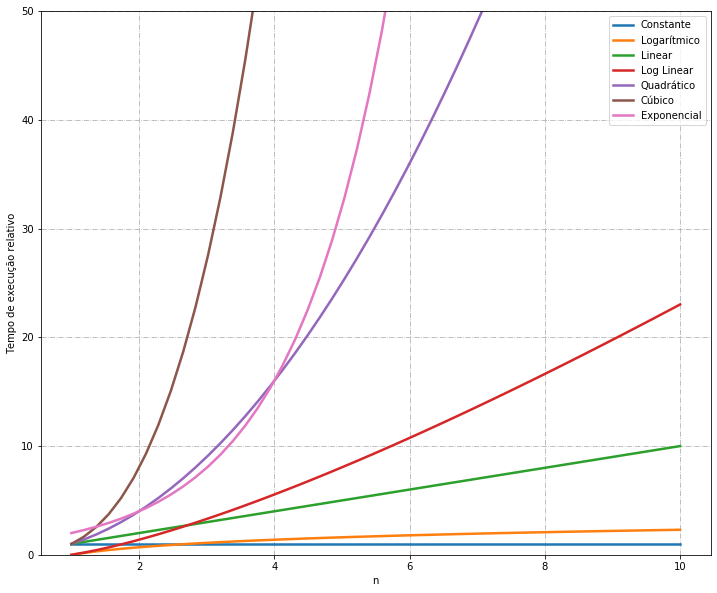

In [5]:
import matplotlib.pyplot as plt
from math import log
import numpy as np

n = np.linspace(1,10)
labels = ['Constante', 'Logarítmico', 'Linear', 'Log Linear', 'Quadrático', 'Cúbico', 'Exponencial']
big_o = [np.ones(n.shape), np.log(n), n, n*np.log(n), n**2, n**3, 2**n]

plt.figure(figsize=(12,10))
plt.ylim(0,50)

for i in range(len(big_o)):
    plt.plot(n, big_o[i], label=labels[i], lw=2.5)

plt.legend(loc=0)
plt.ylabel('Tempo de execução relativo')
plt.xlabel('n')
plt.grid(linestyle='-.')
plt.show()

Claramente nosso objetivo é escolher um algoritmo que esteja distante de qualquer comportamento quadrático, cúbico e exponencial.

### Exemplos Big O

#### O(1) - Constante

Vamos definir uma função de comportamento constante, que imprime o primeiro elemento de uma lista de valores:

In [23]:
def constante(valores):
    print(valores[0])

constante([1,2,3,4,5,6])

1


Não importa quão grande a lista se torne, a função/algoritmo irá apenas pegar o valor indexado na posição **0** da lista, por este motivo ela é constante.

#### O(n) - Linear

Vamos definir uma função linear, que recebe uma lista e imprime todos os valores:

In [28]:
def linear(lista):
    for valores in lista:
        print(valores, end=' ')

Neste caso, o crescimento da lista tem um impacto no desempenho:

In [29]:
linear([1,2,3,4,5]) 

1 2 3 4 5 

Cada valor da lista será impresso ao passar pelo **for loop**, então ao crescer a lista, cresce o Big O, então podemos dizer que esse algoritmo irá escalar linearmente com **n**.

#### O(n^2) - Quadrático

A seguir, iremos definir uma função que imprime pares para cada elemento na lista:

In [30]:
def quadratica(lista):
    for item_1 in lista:
        for item_2 in lista:
            print(item_1,item_2)
            
lista = [1,2,3]
quadratica(lista)

1 1
1 2
1 3
2 1
2 2
2 3
3 1
3 2
3 3


Observe que:

- Temos dois **for loops** aninhados.
- Para uma lista de **n** itens, nós teremos de executar **n** operações para cada item na lista! Isso significa em total que iremos executar **n** vezes **n** atribuições, ou $n^2$. Então uma lista com $10$ itens terá $10^2$ ou $100$ operações. Você pode perceber quão perigoso isso pode se tornar para inputs muito grandes! É por isso que a **Notação Big O** é tão importante para entendermos.
- Então, baseado no exemplo: o **input** de $3$ nos dá $3^2 = 9$ iterações de **output**.

### Calculando a Escala de Big O

Termos insignificantes são desconsiderados na notação Big O.

Quando se trata de Notação Big O nós apenas nos preocupamos com os termos mais significantes, lembre que ao crescer o **input** e ele se tornar maior, apenas os termos que crescem com maior rapidez terão importância/relevância.

Por exemplo, podemos tomar o limite a respeito da infinidade.

Vamos definir uma função que imprime todos os valores de uma lista:

In [32]:
def imprima_uma_vez(lista):
    for valores in lista:
        print(valores)

imprima_uma_vez([1,2,3,4,5])

1
2
3
4
5


Como vimos anteriormene, é possível perceber como esse crescimento é linear em relação ao input: O(n).

Agora vamos definir uma função similar, só que dessa vez ela imprimir todos os itens três vezes:

In [33]:
def imprima_tres_vezes(lista):
    for valores in lista:
        print(valores)
    
    for valores in lista:
        print(valores)
        
    for valores in lista:
        print(valores)

imprima_tres_vezes([1,2,3,4,5])

1
2
3
4
5
1
2
3
4
5
1
2
3
4
5


Este algoritmo irá executar $3$ vezes para cada **n**, sendo assim ele se torna de ordem 3(n). 

Continuando assim, linear. Mais importante, 3($\infty$) não é realmente diferente de ($\infty$), sendo assim podemos abandonar as constantes insignificantes.

Podemos então dizer que este algoritmo é apenas O(n).

A seguir vamos definir uma função que realiza algumas computações:

1. Imprime o primeiro item O(1), sendo assim ela é constante.
2. Depois ela calcula o $\dfrac{1}{2}$ da lista e imprime todos os valores até ele (excluindo ele): O(n/2).
3. Depois ela imprime uma string 10 vezes O(10), sendo assim constante.

In [34]:
def computação(lista):
    print(lista[0])
    
    ponto_médio = len(lista)//2
    
    for valores in lista[:ponto_médio]:
        print(valores)
    
    for x in range(10):
        print('Número!')

In [35]:
lista = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
computação(lista)

1
1
2
3
4
5
6
7
Número!
Número!
Número!
Número!
Número!
Número!
Número!
Número!
Número!
Número!


#### O(1 + n/2 + 10)

Ao **n** se tornar maior e maior (escalar) nós podemos facilmente percerber como o 1 e o 10 começam a se tornar irrelevantes e posteriormente a divisão também começará a não ter efeito.

Podemos então concluir que esse algoritmo é de ordem O(n).

### Pior Caso vs Melhor Caso

Muitas vezes nós estamos apenas preocupados com o pior possível caso de um algoritmo. 

É importante termos em mente que os cenários de pior caso e o melhor caso podem ser completamente diferentes em questão de tempo Big O.

A seguir temos um simples algoritmo em que: dada uma lista chamada lista, retorna um booelano indicando se determinado item está presente na lista.

In [37]:
def matcher(lista,match):   
    for item in lista:
        if item == match:
            return True
    return False

In [36]:
lista = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
print(lista)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


A seguir temos o melhor caso, pois o item buscado está no índice **0**. 

O(1) o melhor caso se torna constante:

In [38]:
matcher(lista,1)

True

Esse é o pior caso, a lista inteira deve ser vasculhada, **n** elementos. 

O(n) o pior caso se torna linear:

In [39]:
matcher(lista,15)

True

### Complexidade do Espaço

Também nos interessa a quantidade de memória/espaço que um algoritmo utiliza. 

A notação de complexidade de espaço é a mesma, mas ao invés de checar operações de tempo, nós checamos o tamanho de alocação de memória.

Por exemplo, considera a função a seguir que imprime "Hello World!" **n** vezes:

In [40]:
def memória(n=10):
    for x in range(n): # Complexidade de tempo O(n)
        print("Hello World!") # Complexidade de espaço O(1)

memória(10)

Hello World!
Hello World!
Hello World!
Hello World!
Hello World!
Hello World!
Hello World!
Hello World!
Hello World!
Hello World!


O(n) para a complexidade de tempo, mas e a respeito da complexidade de espaço?

Em memória não há necessidade de guardar 10 versões de "Hello World!", ele apenas precisa guardar uma string, portanto temos: O(1).

### Sequências 

Algumas das sequências mais comuns que temos em Python são as seguintes:

- **Lista** = `[]`

- **Tupla** = `()`

- **String** = `""` 

Todas elas suportam indexação.

Para entendermos melhor como os arrays funcionam é importante entendermos a arquitetura de computadores em baixo nível:

- Memória é armazenada em **bits**
- 8 bits = 1 byte
- Há um endereço de memória para cada **byte**

![img](https://raw.githubusercontent.com/the-akira/Python-Matematica/master/imagens/listas.png)

Ele é guardado e recuperado em O(1) tempo constante.

Python representa caracteres Unicode com 8 bits (1 byte).

![img](https://raw.githubusercontent.com/the-akira/Python-Matematica/master/imagens/caracteres.png)

Nesse caso, **PYTHON** possui 6 caracteres, ou seja, 6 bytes, uma vez que temos:

- Um array de 6 caracteres
- Cada caracter ocupa uma célula
- Índice descreve localização

Apenas para ilustrar o conhecimento, pois normalmente iremos utilizar abstrações de alto nível.

A seguir podemos confirmar que a string "PYTHON" ocupa de fato 6 bytes:

In [41]:
len("PYTHON".encode("utf8"))

6

Isso porque ela usa caracteres ASCII, se formos considerar caracteres Chineses, cada um irá ocupar 3 bytes:

In [6]:
len("陰陽".encode("utf8"))

6

### Listas e Referências

Considere que foi criada uma lista chamada de **primos**, guardando números primos.

Se for criado um novo objeto **temp**, e sendo ele uma referência a uma porção da lista **primos**, então foi criado uma nova lista, porém referenciando uma localização de índice de saída.

![img](https://raw.githubusercontent.com/the-akira/Python-Matematica/master/imagens/referencias.png)

Se desejarmos alterar uma atribuição indexada na nova lista **temp**:

`temp[2] = 15`

A lista original não é alterada, a nova posição indexada apenas aponta para um novo e diferente objeto.

Importante lembrar: novas listas criam uma cópia superficial, significa que você está apenas alterando/criando seus ponteiros e não duplicando objetos em memória.

Muito do que estamos fazendo é manipular referências e chamadas, não os objetos em si.

A seguir podemos calcular quanto de memória que uma lista ocupa:

In [52]:
import sys

n = 10
dados = []

for i in range(n):
    a = len(dados)
    b = sys.getsizeof(dados)
    print('Comprimento: {0:2d} | Tamanho em Bytes: {1:3d}'.format(a,b))
    dados.append(n)

Comprimento:  0 | Tamanho em Bytes:  72
Comprimento:  1 | Tamanho em Bytes: 104
Comprimento:  2 | Tamanho em Bytes: 104
Comprimento:  3 | Tamanho em Bytes: 104
Comprimento:  4 | Tamanho em Bytes: 104
Comprimento:  5 | Tamanho em Bytes: 136
Comprimento:  6 | Tamanho em Bytes: 136
Comprimento:  7 | Tamanho em Bytes: 136
Comprimento:  8 | Tamanho em Bytes: 136
Comprimento:  9 | Tamanho em Bytes: 200


### Arrays Dinâmicos

A seguir, veremos um problema relacionado a arrays dinâmicos.

#### Problema

Dadas duas strings, cheque-as para ver se elas são anagramas. Um anagrama é quando as duas strings podem ser reescritas usando exatamente as mesmas letras (sendo assim você pode apenas reorganizar as letras para obter uma frase ou palavra diferente).

Por exemplo:

"Pedro" é um anagrama de "Poder".

"Client Eastwood" é um anagrama de "old west action".

**Observação**: Ignore espaços e capitalização. Sendo assim, "d go" é um anagrama de "God" e "dog" um anagrama de "o d g".

In [53]:
def anagrama(str1, str2):
    # Remove espaços e letras lower case
    str1 = str1.replace(' ','').lower()
    str2 = str2.replace(' ','').lower()  
    # Retorna um booleano para a correspondência ordenada
    return sorted(str1) == sorted(str2)

Como a função definida, podemos testá-la:

In [54]:
anagrama('pedro','poder')

True

In [55]:
anagrama('teste','peste')

False

In [56]:
anagrama('gol','log')

True

Esta solução não é otimizada, vamos tentar melhorar ela, dessa vez com contadores e dicionários:

In [57]:
def anagrama_dois(str1, str2):
    str1 = str1.replace(' ','').lower()
    str2 = str2.replace(' ','').lower()
    
    # Checa se há o mesmo número de letras
    if len(str1) != len(str2):
        return False
    
    # Conta a frequência de cada letra
    contador = {}
    
    # Para cada letra na primeira string
    for letra in str1: 
        if letra in contador: # Se a letra já está em nosso dicionário, então
            contador[letra] += 1 # Adiciona 1 para a chave letra do dicionário
        else:
            contador[letra] = 1
    
    # Faz o inverso para a segunda string
    for letra in str2:
        if letra in contador:
            contador[letra] -= 1
        else:
            contador[letra] = 1
    
    # Percorremos o contador
    for k in contador: 
        if contador[k] != 0: # Caso o contador nos retorne um valor diferente de 0, indica que não obtivemos um anagrama
            return False
    
    return True

Vamos agora testá-la:

In [58]:
anagrama_dois('Clint Eastwood', 'old WEST action')

True

In [60]:
anagrama_dois('William Shakespeare', 'I am a weakish speller')

True

In [61]:
anagrama_dois('Tokyo', 'Kyoto')

True

In [62]:
anagrama_dois('Matemática', 'Computação')

False